# Project 2 - EDA_Modeling

In this second notebook, I looked to explore and understand the data before attempting modeling. Through the use of Lasso Regression, I was able to sift through most of the data to find key features which I then put through polynomial featuring to better display the relationships between the variables and gave an overall better prediction. 


#### Contents: 
- [Preliminary Data Formatting](#Preliminary-Data-Formatting)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Correlations & Heatmap](#Correlations-&-Heatmap)
- [Modeling & Feature Selection](#Modeling-&-Feature-Selection)
- [Linear Regression Model](#Linear-Regression-Model)
- [Ridge Regression](#Ridge-Regression)
- [Lasso Regression](#Lasso-Regression)


## Preliminary-Data-Formatting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv('datasets/train_cleaned.csv')
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,NaN,0,3,2010,WD,138500


In [3]:
train.fillna('NA',inplace=True)
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,NA,IR1,Lvl,...,0,0,0,0,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,0,0,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,0,0,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,0,0,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,0,0,NA,0,3,2010,WD,138500


In [4]:
train_dummies = pd.read_csv('datasets/train_dummies.csv')
train_dummies.columns = train_dummies.columns.str.lower()
train_dummies.columns = train_dummies.columns.str.replace(' ', '')
train_dummies.head()


,mszoning_a(agr),mszoning_c(all),mszoning_fv,mszoning_i(all),mszoning_rh,mszoning_rl,mszoning_rm,street_grvl,street_pave,alley_grvl,...,fence_na,saletype_cod,saletype_cwd,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_new,saletype_oth,saletype_wd
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
train.select_dtypes(object)

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,...,masvnrtype,foundation,heating,centralair,electrical,functional,garagetype,paveddrive,fence,saletype
0,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,...,BrkFace,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD
1,RL,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,...,BrkFace,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD
2,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,NA,CBlock,GasA,Y,SBrkr,Typ,Detchd,Y,NA,WD
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,...,NA,PConc,GasA,Y,SBrkr,Typ,BuiltIn,Y,NA,WD
4,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,...,NA,PConc,GasA,Y,SBrkr,Typ,Detchd,N,NA,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,RL,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,...,NA,PConc,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD
2046,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,NA,CBlock,GasA,Y,SBrkr,Typ,Detchd,Y,NA,WD
2047,RL,Pave,NA,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,...,NA,BrkTil,GasA,Y,SBrkr,Typ,Detchd,Y,NA,WD
2048,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,NA,CBlock,GasA,Y,SBrkr,Typ,Attchd,Y,NA,WD


### Import Dummies

In [6]:
test = pd.read_csv('datasets/test_cleaned.csv')

In [7]:
test.fillna('NA',inplace=True)
test.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,...,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,fence,miscval,mosold,yrsold,saletype
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,60,112,0,0,0,NA,0,4,2006,WD
1,2718,905108090,90,RL,69.630042,9662,Pave,NA,IR1,Lvl,...,0,0,0,0,0,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.000000,17104,Pave,NA,IR1,Lvl,...,24,0,0,0,0,NA,0,9,2006,New
3,1989,902207150,30,RM,60.000000,8520,Pave,NA,Reg,Lvl,...,0,184,0,0,0,NA,0,7,2007,WD
4,625,535105100,20,RL,69.630042,9500,Pave,NA,IR1,Lvl,...,76,0,0,185,0,NA,0,7,2009,WD


In [8]:
test_dummies = pd.read_csv('datasets/test_dummies.csv')
test_dummies.columns = test_dummies.columns.str.lower()
test_dummies.columns = test_dummies.columns.str.replace(' ', '')
test_dummies.head()


,mszoning_c(all),mszoning_fv,mszoning_i(all),mszoning_rh,mszoning_rl,mszoning_rm,street_grvl,street_pave,alley_grvl,alley_na,...,saletype_cod,saletype_cwd,saletype_con,saletype_conld,saletype_conli,saletype_conlw,saletype_new,saletype_oth,saletype_vwd,saletype_wd
0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [9]:
test_dummy_missing = set(test_dummies.columns.values).difference(train_dummies.columns.values)
test_dummy_missing

{'exterior1st_precast',
 'exterior2nd_other',
 'exterior2nd_precast',
 'heating_floor',
 'masvnrtype_cblock',
 'roofmatl_metal',
 'roofmatl_roll',
 'saletype_vwd'}

In [10]:
train_dummy_missing = set(train_dummies.columns.values).difference(test_dummies.columns.values)
train_dummy_missing

{'condition2_artery',
 'condition2_rrae',
 'condition2_rran',
 'condition2_rrnn',
 'electrical_mix',
 'exterior1st_cblock',
 'exterior1st_imstucc',
 'exterior1st_stone',
 'exterior2nd_stone',
 'functional_sal',
 'functional_sev',
 'heating_othw',
 'heating_wall',
 'mszoning_a(agr)',
 'neighborhood_grnhill',
 'neighborhood_landmrk',
 'roofmatl_clytile',
 'roofmatl_membran',
 'utilities_nosewa'}

In [11]:
for i in train_dummy_missing:
    test_dummies[i] = 0 

In [12]:
for i in test_dummy_missing:
    train_dummies[i] = 0 

In [13]:
train_dummies.shape

(2050, 193)

In [14]:
test_dummies.shape

(879, 193)

In [15]:
test_full = pd.concat([test.select_dtypes(exclude= object), test_dummies], axis=1)
test_full.head()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,...,functional_sev,mszoning_a(agr),condition2_rrae,neighborhood_grnhill,exterior1st_cblock,roofmatl_clytile,condition2_rran,electrical_mix,functional_sal,heating_wall
0,2658,902301120,190,69.000000,9142,6,8,1910,1950,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2718,905108090,90,69.630042,9662,5,4,1977,1977,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2414,528218130,60,58.000000,17104,7,5,2006,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1989,902207150,30,60.000000,8520,5,6,1923,2006,0.0,...,0,0,0,0,0,0,0,0,0,0
4,625,535105100,20,69.630042,9500,6,5,1963,1963,247.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
train_full = pd.concat([train.select_dtypes(exclude= object), train_dummies], axis=1)
train_full.head()

,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,...,saletype_oth,saletype_wd,roofmatl_metal,exterior1st_precast,exterior2nd_precast,masvnrtype_cblock,heating_floor,saletype_vwd,exterior2nd_other,roofmatl_roll
0,109,533352170,60,68.0,13517,6,8,1976,2005,289.0,...,0,1,0,0,0,0,0,0,0,0
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,1,0,0,0,0,0,0,0,0
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,1,0,0,0,0,0,0,0,0
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,1,0,0,0,0,0,0,0,0
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,1,0,0,0,0,0,0,0,0


# Exploratory Data Analysis  

First I'll attempt to understand the distributions of the data through some simple plots. 

In [17]:
# create histogram function
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=10)
        ax[i].set_title(f'{column}',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()

In [18]:
# create Num_histogram function
def subplot_num_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column],bins=10)
        ax[i].axvline(dataframe[column].median(), color='red', linestyle='dashed')
        ax[i].set_title(f'{column}',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
    plt.tight_layout()

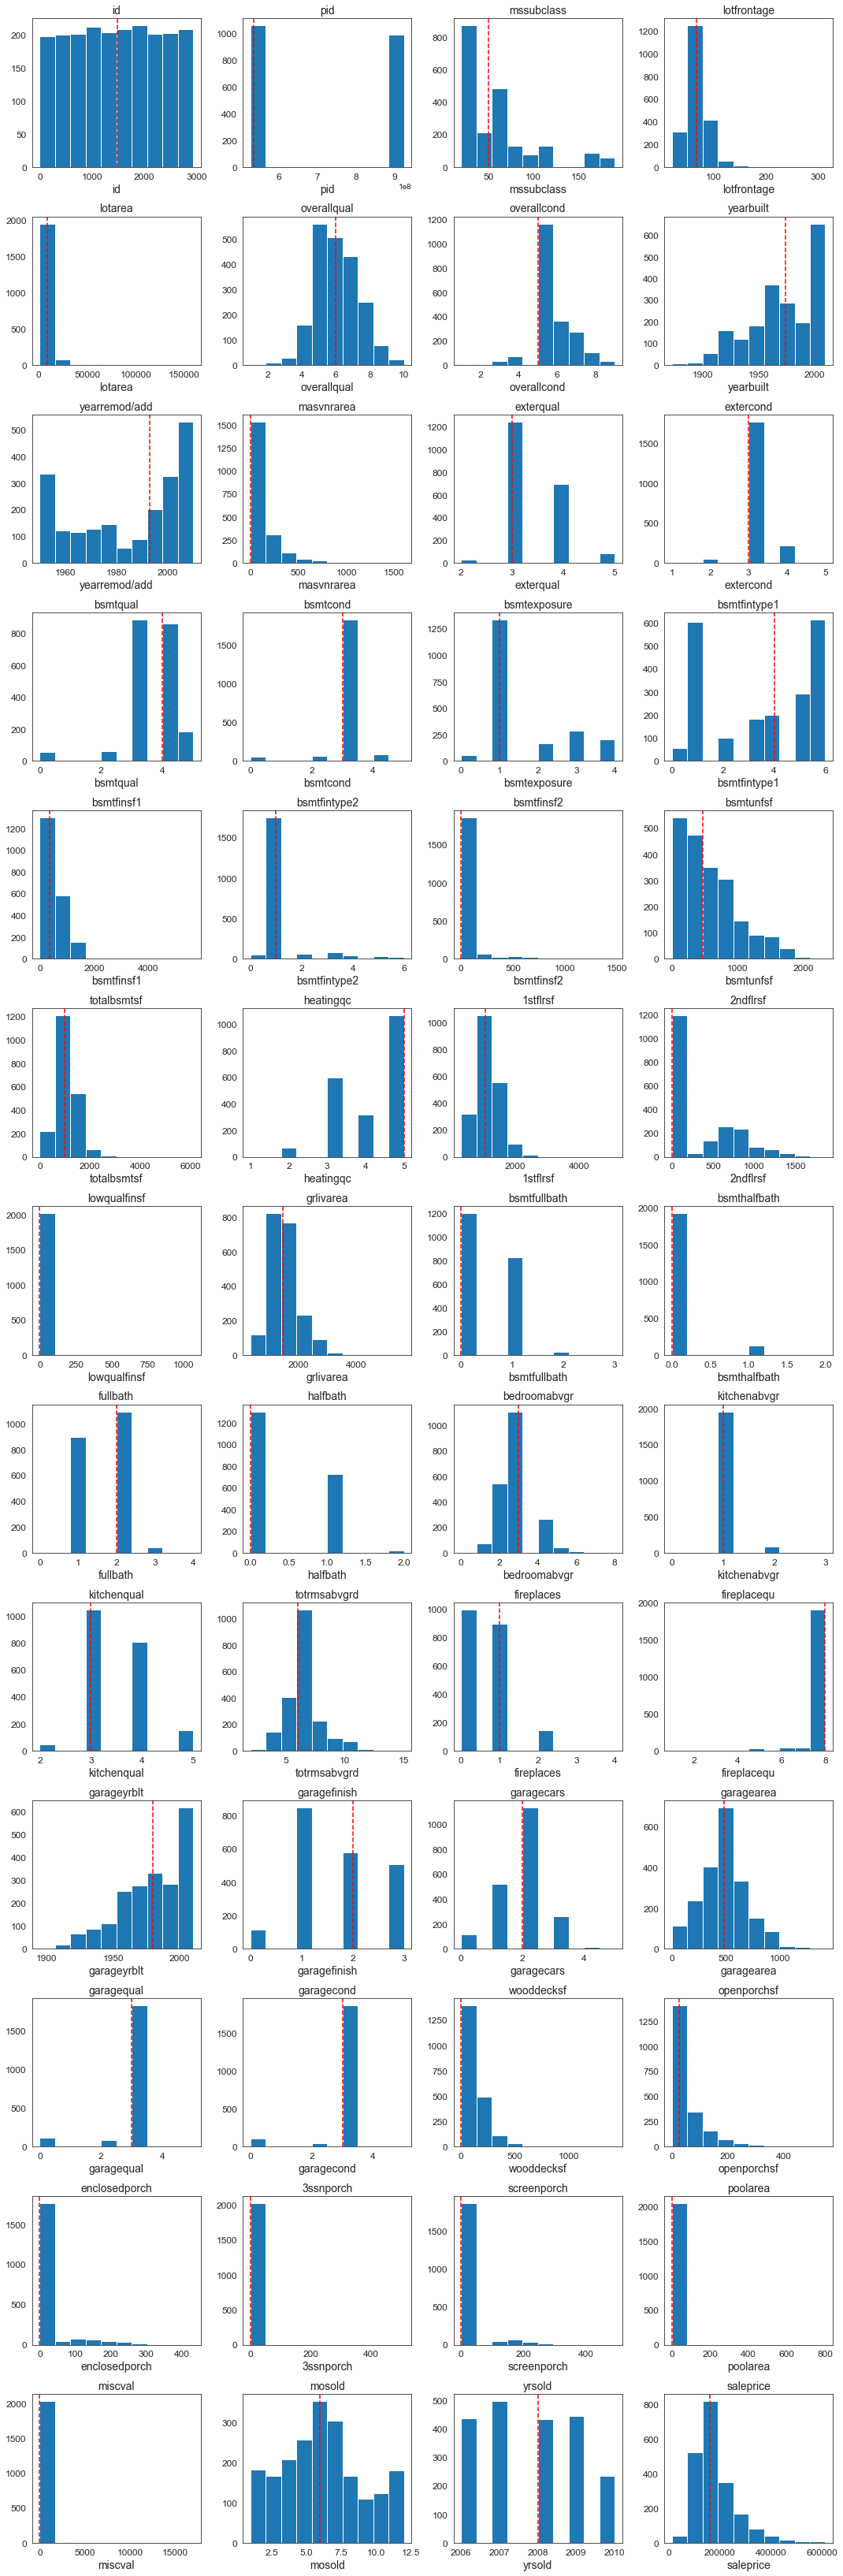

In [19]:
sns.set_style("white")
subplot_num_histograms(train, train.select_dtypes(exclude=object).columns)

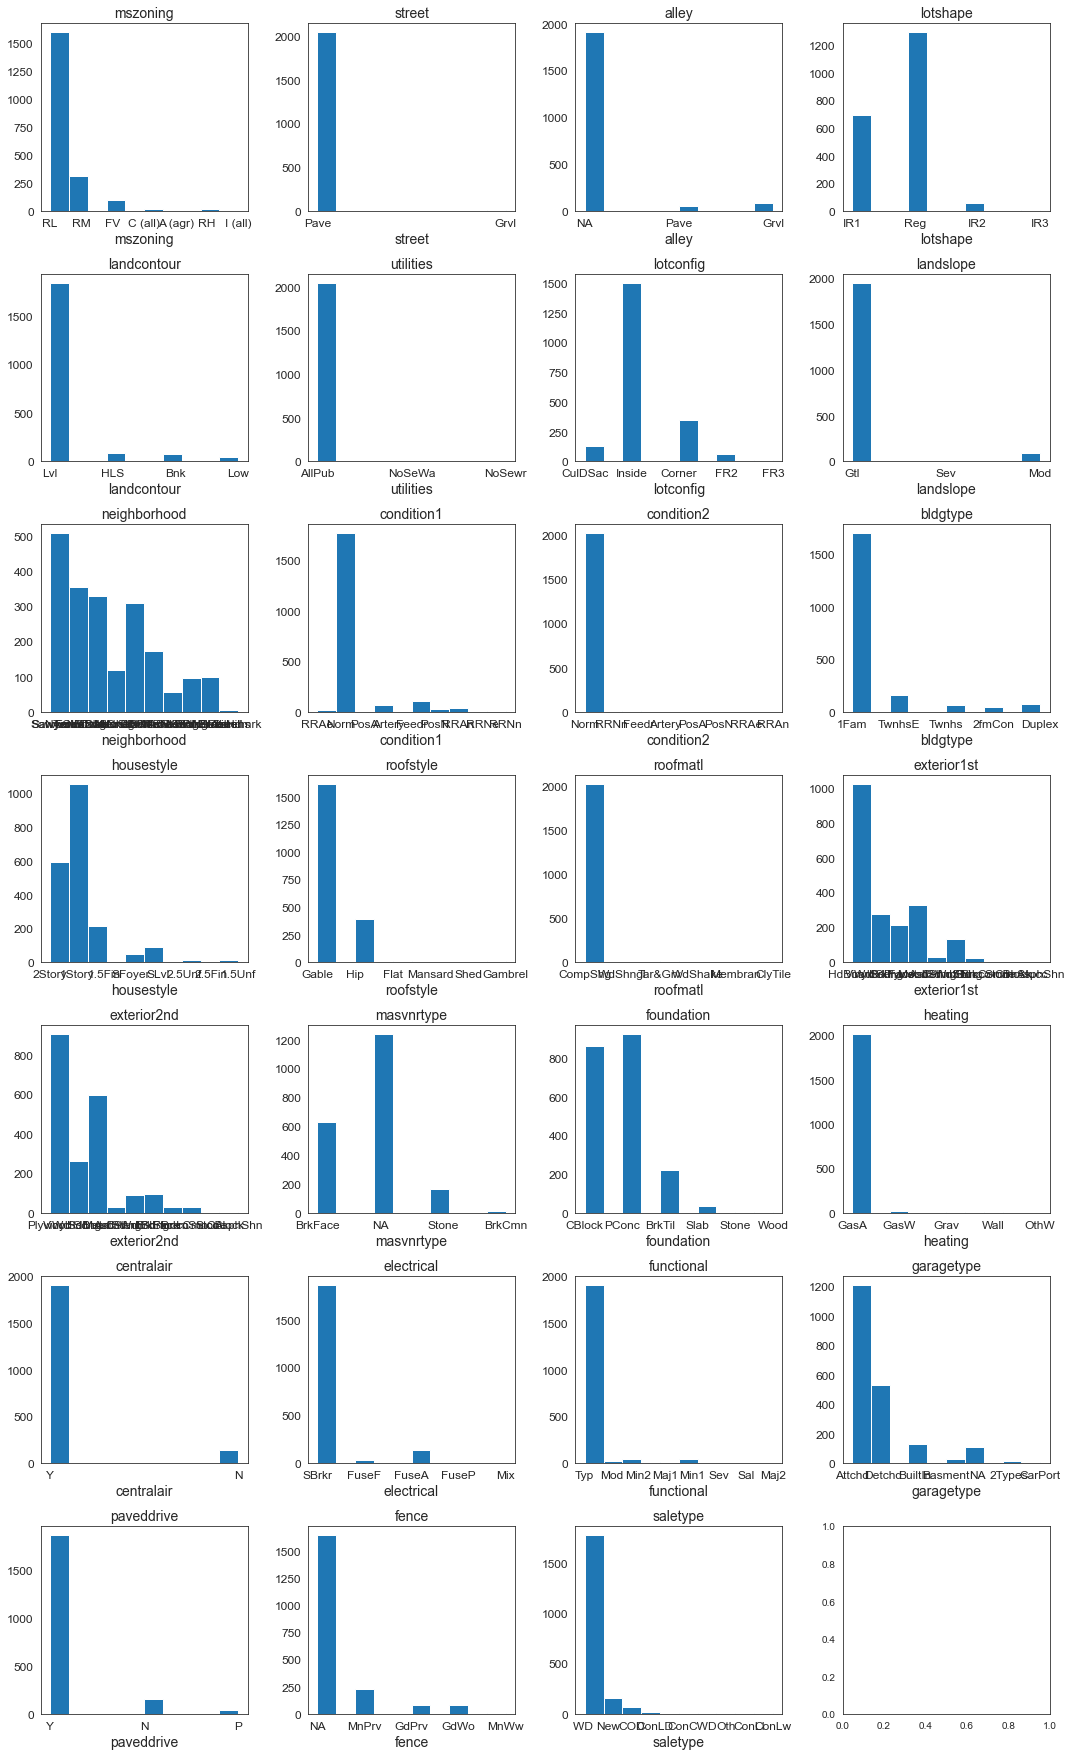

In [20]:
sns.set_style("white")
subplot_histograms(train, train.select_dtypes(object).columns)

# Plot Scatters

In [21]:
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        sns.regplot(y=dataframe.saleprice, x=dataframe[column],ax=ax[i])
        ax[i].set_title(f'{column} vs saleprice',fontsize=14)  
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('saleprice', fontsize=14)
    plt.tight_layout()

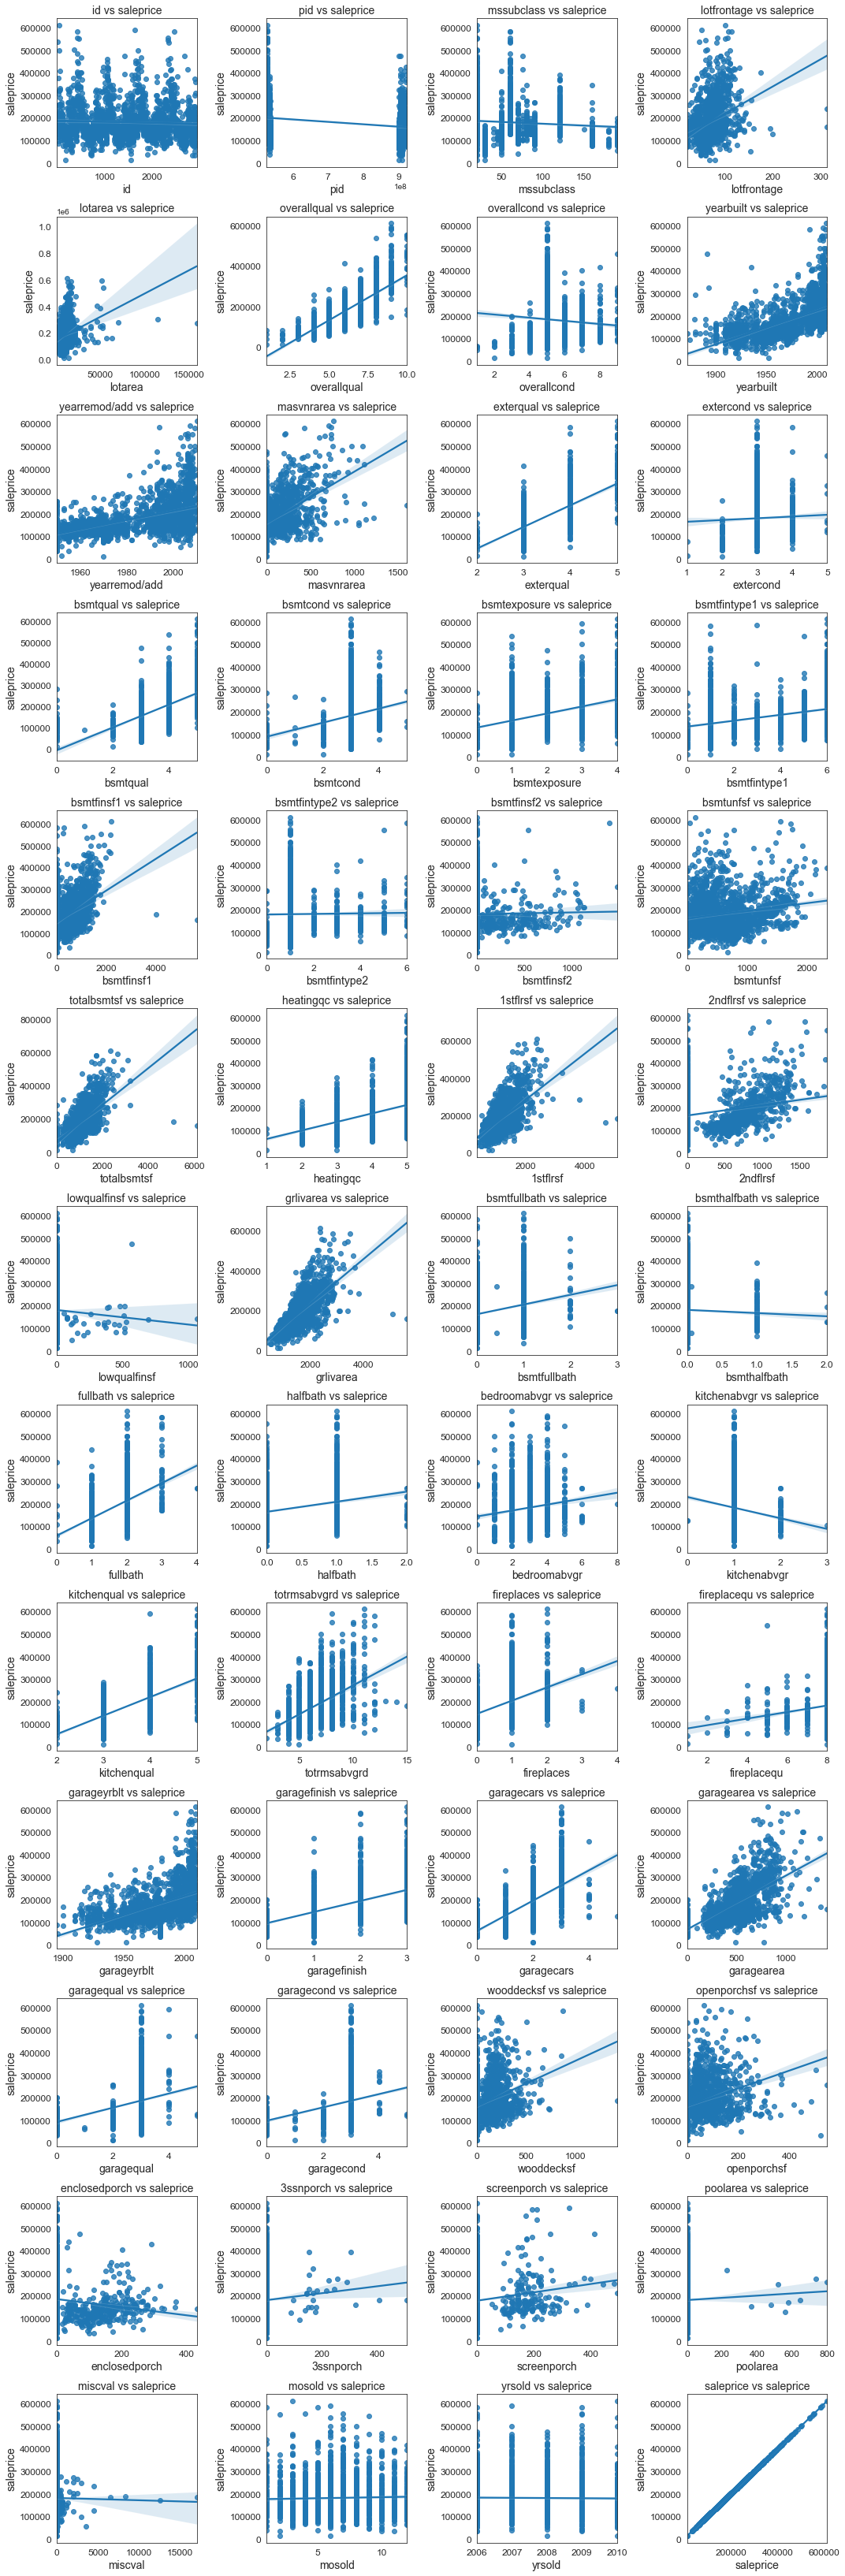

In [22]:
col_numerical = train.select_dtypes(exclude=object).columns
subplot_scatter(train,col_numerical)

- Some more interesting variables on display here. Standout variables seem to be overallqual, grlivarea.

## Correlations & Heatmap

In [23]:
corr_matrix = train_full.corr()[['saleprice']].sort_values('saleprice')
corr_matrix.sort_values('saleprice', ascending=False).head(10)

,saleprice
saleprice,1.000000
overallqual,0.800208
exterqual,0.712124
grlivarea,0.697261
kitchenqual,0.692587
garagearea,0.650270
garagecars,0.648220
totalbsmtsf,0.628638
1stflrsf,0.618451
bsmtqual,0.612364


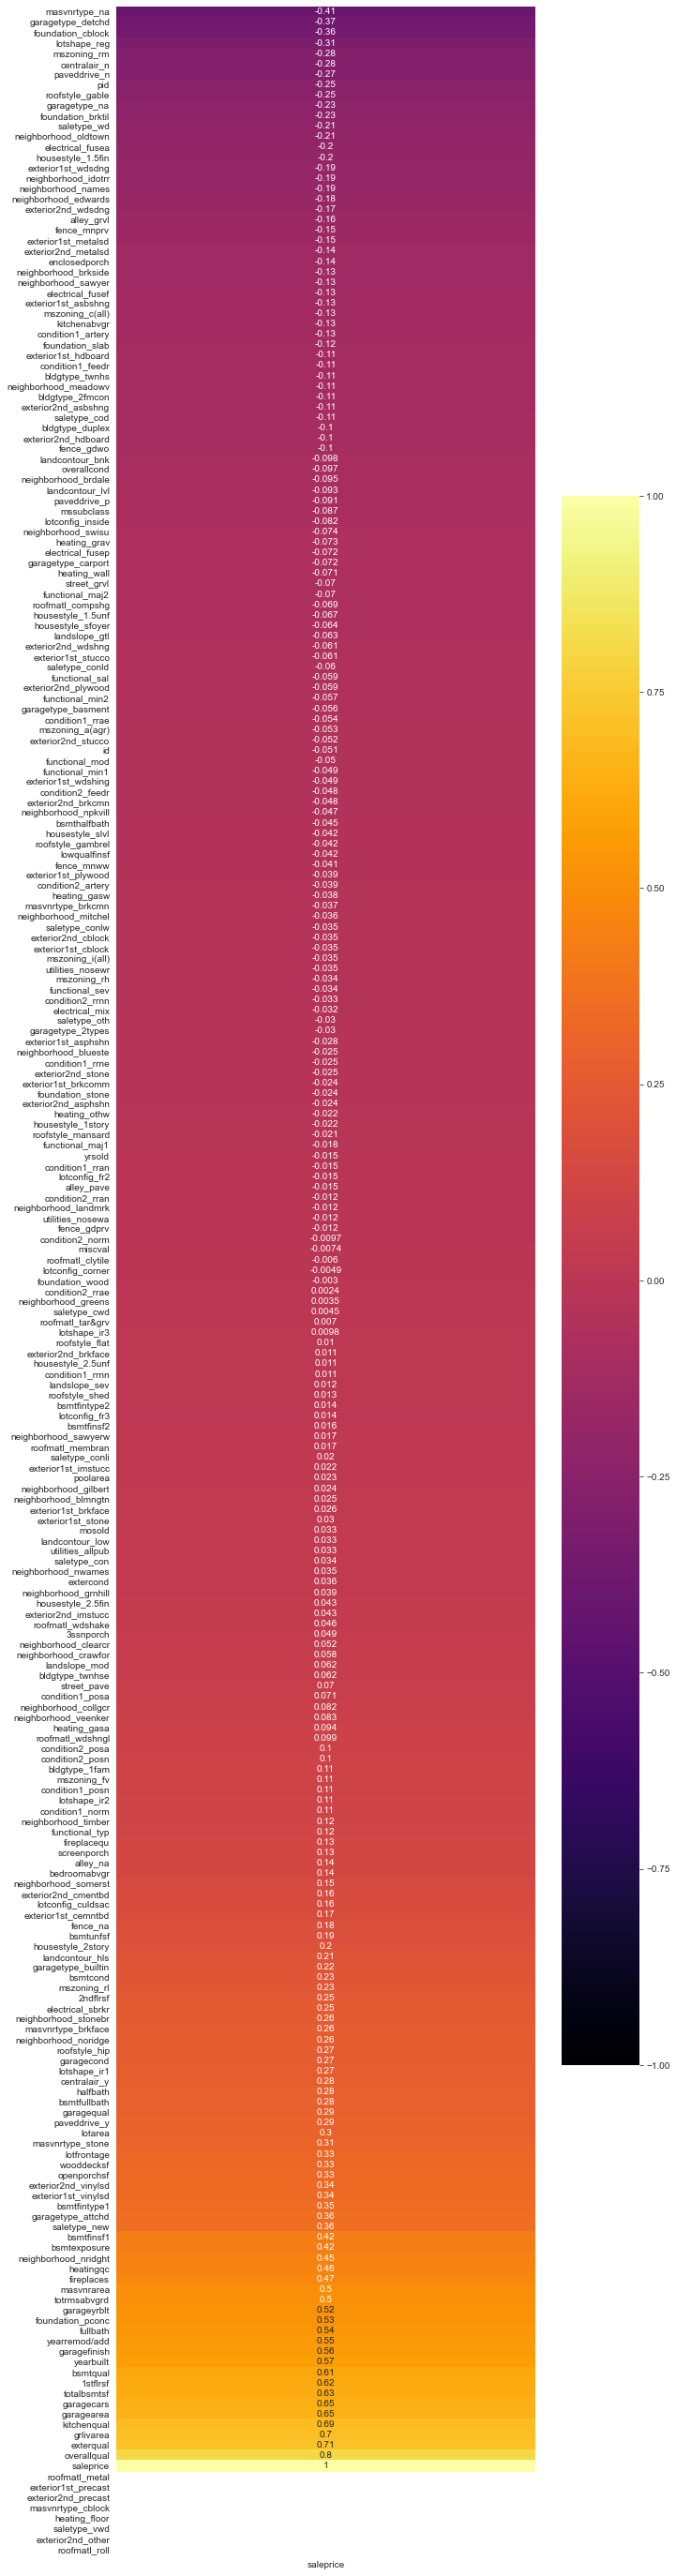

In [24]:
plt.figure(figsize=(10,50))
sns.heatmap(corr_matrix, annot = True, vmin =-1, vmax=1, cmap='inferno');

In [25]:
corr_matrix[abs(corr_matrix['saleprice'])>(0.20)]

,saleprice
masvnrtype_na,-0.411098
garagetype_detchd,-0.370297
foundation_cblock,-0.355772
lotshape_reg,-0.306202
mszoning_rm,-0.281899
...,...
kitchenqual,0.692587
grlivarea,0.697261
exterqual,0.712124
overallqual,0.800208


# Modeling & Feature Selection

In [26]:
train_full.shape

(2050, 245)

In [27]:
test_full.shape

(879, 244)

In [28]:
features = train_full.columns[train_full.columns !='saleprice']

In [29]:
X = train_full[features]
y = train_full['saleprice']
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (2050, 244)
y.shape: (2050,)


### Linear Regression Model

In [30]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [31]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, Xs, y, cv=10)
print (lr_scores)
print (lr_scores.mean())

[ 8.81702132e-01  7.95669147e-01 -1.40204336e+25 -5.86099733e+24
 -2.13930457e+24 -1.75366009e+25 -5.83145437e+23 -4.42178344e+24
  8.81886921e-01 -1.44775405e+23]
-4.470704072571784e+24


In [32]:
lr.fit(X, y)

LinearRegression()

In [33]:
lr_coef = pd.Series(lr.coef_, index = X.columns).sort_values(ascending = False).to_frame(name = 'coef')
lr_coef

,coef
roofmatl_membran,141622.394843
roofmatl_wdshngl,114868.460205
neighborhood_grnhill,110393.400452
roofmatl_tar&grv,86199.200910
roofmatl_wdshake,75021.933710
...,...
mszoning_a(agr),-28025.998875
utilities_nosewa,-30985.838677
heating_othw,-31467.197672
functional_sev,-32044.757062


In [34]:
lr_coef.loc[lr_coef['coef']==0]

,coef
exterior1st_precast,0.0
roofmatl_metal,0.0
exterior2nd_precast,0.0
masvnrtype_cblock,0.0
heating_floor,0.0
exterior2nd_other,0.0
saletype_vwd,0.0
roofmatl_roll,0.0


In [35]:
features = lr_coef.loc[lr_coef['coef']!=0]
features = features.index
features

Index(['roofmatl_membran', 'roofmatl_wdshngl', 'neighborhood_grnhill',
       'roofmatl_tar&grv', 'roofmatl_wdshake', 'roofmatl_compshg',
       'condition2_rrae', 'exterior1st_cblock', 'neighborhood_stonebr',
       'exterior2nd_asphshn',
       ...
       'neighborhood_nwames', 'condition2_artery', 'roofstyle_mansard',
       'exterior1st_brkcomm', 'exterior2nd_cblock', 'mszoning_a(agr)',
       'utilities_nosewa', 'heating_othw', 'functional_sev',
       'roofmatl_clytile'],
      dtype='object', length=236)

## Ridge Regression

In [36]:
X = train_full[features]
y = train_full['saleprice']

In [37]:
X.shape

(2050, 236)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [40]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [41]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print('Ridge R2 Train Score:',ridge_scores.mean())

Ridge R2 Train Score: 0.8269889528921558


In [42]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [43]:
print('Ridge R2 Test Score:', ridge.score(X_test, y_test))

Ridge R2 Test Score: 0.9082991666628007


## Lasso Regression

In [44]:
X = train_full[features]
y = train_full['saleprice']

In [45]:
X.shape

(2050, 236)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [48]:
lasso = LassoCV(n_alphas=500)

In [49]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

In [50]:
print('Lasso Regression R2 Train Score:', lasso_scores.mean())

Lasso Regression R2 Train Score: 0.8413963928398932


In [51]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=500)

In [52]:
print('Lasso Regression R2 Test Score:', lasso.score(X_test, y_test))

Lasso Regression R2 Test Score: 0.9101719414052329


## Modeling Insights

Both Lasso & Ridge had significant increases in R2 test score with Lasso Regression. 

## Feature Engineering with Lasso

In [53]:
len(features)

236

In [54]:
X = train_full[features]
y = train_full['saleprice']

In [55]:
X.shape

(2050, 236)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [58]:
n_alphas = np.logspace(3, 7, 5)

In [59]:
lasso = LassoCV(alphas = [7500])

In [60]:
lasso.fit(X_train, y_train)

LassoCV(alphas=[7500])

In [61]:
lasso.score(X_train, y_train)

0.8097728320618418

In [62]:
lasso.score(X_test, y_test)

0.8465546919579054

In [63]:
lasso.alpha_

7500

In [64]:
lasso_coef = pd.Series(lasso.coef_, index =features).sort_values(ascending = False).to_frame(name = 'lasso_coef')
lasso_coef

,lasso_coef
overallqual,20073.497928
grlivarea,18160.470920
exterqual,8537.679279
kitchenqual,6771.227279
garagecars,4065.434098
...,...
exterior1st_plywood,-0.000000
paveddrive_n,-0.000000
extercond,0.000000
electrical_sbrkr,0.000000


In [65]:
lasso_coef.loc[lasso_coef['lasso_coef']!=0].shape

(20, 1)

In [66]:
features2 = lasso_coef.loc[lasso_coef['lasso_coef']!=0]
features2 = features2.index
features2

Index(['overallqual', 'grlivarea', 'exterqual', 'kitchenqual', 'garagecars',
       'neighborhood_nridght', 'garagearea', 'bsmtfinsf1', '1stflrsf',
       'bsmtexposure', 'bsmtqual', 'fireplaces', 'masvnrarea', 'yearbuilt',
       'neighborhood_stonebr', 'totalbsmtsf', 'lotarea', 'saletype_new',
       'roofstyle_hip', 'roofmatl_clytile'],
      dtype='object')

In [67]:
test_scaled = ss.transform(test_full[features])

In [68]:
lasso_pred = lasso.predict(test_scaled)

In [69]:
predicted = pd.Series(lasso_pred).to_frame(name ='SalePrice')
predicted

,SalePrice
0,151384.105760
1,176241.618364
2,212230.089228
3,136905.337027
4,173847.592730
...,...
874,182266.733862
875,213839.288055
876,132352.834303
877,111054.874909


In [70]:
test_ids = pd.DataFrame(test.iloc[:,0])

newdf = pd.concat([test_ids, predicted], axis = 1)
newdf.rename(columns={0: 'SalePrice'}, inplace=True)
newdf.head()

,id,SalePrice
0,2658,151384.105760
1,2718,176241.618364
2,2414,212230.089228
3,1989,136905.337027
4,625,173847.592730


In [71]:
newdf.rename(columns= {'id':'Id'}, inplace=True)

In [72]:
newdf.to_csv('datasets/pred1.csv', index=False)

# Polynomial Featuring

In [73]:
X = train_full[features2]

In [74]:
poly = PolynomialFeatures(include_bias=False)

In [75]:
X_poly = poly.fit_transform(X)

In [76]:
poly_scale = StandardScaler()

In [77]:
train_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(features2))
train_poly

,overallqual,grlivarea,exterqual,kitchenqual,garagecars,neighborhood_nridght,garagearea,bsmtfinsf1,1stflrsf,bsmtexposure,...,lotarea^2,lotarea saletype_new,lotarea roofstyle_hip,lotarea roofmatl_clytile,saletype_new^2,saletype_new roofstyle_hip,saletype_new roofmatl_clytile,roofstyle_hip^2,roofstyle_hip roofmatl_clytile,roofmatl_clytile^2
0,6.0,1479.0,4.0,4.0,2.0,0.0,475.0,533.0,725.0,1.0,...,182709289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,2122.0,4.0,4.0,2.0,0.0,559.0,637.0,913.0,1.0,...,132066064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.0,1057.0,3.0,4.0,1.0,0.0,246.0,731.0,1057.0,1.0,...,62758084.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,1444.0,3.0,3.0,2.0,0.0,400.0,0.0,744.0,1.0,...,96079204.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.0,1445.0,3.0,3.0,2.0,0.0,484.0,0.0,831.0,1.0,...,202635225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,8.0,1728.0,4.0,4.0,2.0,0.0,520.0,1011.0,1728.0,3.0,...,131079601.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2046,4.0,861.0,3.0,3.0,2.0,0.0,539.0,262.0,861.0,1.0,...,152324964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2047,6.0,1913.0,3.0,3.0,2.0,0.0,342.0,0.0,1172.0,1.0,...,57123364.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,4.0,1200.0,3.0,3.0,1.0,0.0,294.0,155.0,1200.0,1.0,...,108160000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
train_poly_scaled = pd.DataFrame(poly_scale.fit_transform(X_poly), columns=poly.get_feature_names(features2))
train_poly_scaled

,overallqual,grlivarea,exterqual,kitchenqual,garagecars,neighborhood_nridght,garagearea,bsmtfinsf1,1stflrsf,bsmtexposure,...,lotarea^2,lotarea saletype_new,lotarea roofstyle_hip,lotarea roofmatl_clytile,saletype_new^2,saletype_new roofstyle_hip,saletype_new roofmatl_clytile,roofstyle_hip^2,roofstyle_hip roofmatl_clytile,roofmatl_clytile^2
0,-0.079017,-0.040308,1.009807,0.725669,0.292293,-0.251551,0.006153,0.196820,-1.108926,-0.583007,...,0.053087,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
1,0.622216,1.244677,1.009807,0.725669,0.292293,-0.251551,0.395255,0.422375,-0.634677,-0.583007,...,-0.021738,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
2,-0.780250,-0.883641,-0.691183,0.725669,-1.016006,-0.251551,-1.054612,0.626242,-0.271423,-0.583007,...,-0.124140,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
3,-0.780250,-0.110252,-0.691183,-0.776979,0.292293,-0.251551,-0.341259,-0.959147,-1.060997,-0.583007,...,-0.074908,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
4,-0.079017,-0.108254,-0.691183,-0.776979,0.292293,-0.251551,0.047842,-0.959147,-0.841531,-0.583007,...,0.082527,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,1.323450,0.457299,1.009807,0.725669,0.292293,-0.251551,0.214600,1.233504,1.421241,1.269960,...,-0.023196,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
2046,-1.481484,-1.275332,-0.691183,-0.776979,0.292293,-0.251551,0.302611,-0.390923,-0.765853,-0.583007,...,0.008194,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
2047,-0.079017,0.827007,-0.691183,-0.776979,0.292293,-0.251551,-0.609925,-0.959147,0.018676,-0.583007,...,-0.132465,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
2048,-1.481484,-0.597867,-0.691183,-0.776979,-1.016006,-0.251551,-0.832269,-0.622984,0.089309,-0.583007,...,-0.057059,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092


In [79]:
X_train, X_test, y_train, y_test = train_test_split(train_poly_scaled, y, random_state=42)

In [80]:
alpha2 = np.logspace(2, 5, 10)

In [81]:
cross_lasso = LassoCV(alphas=alpha2, cv=5, max_iter=100000)

In [82]:
cross_lasso.fit(X_train, y_train)

LassoCV(alphas=array([   100.        ,    215.443469  ,    464.15888336,   1000.        ,
         2154.43469003,   4641.58883361,  10000.        ,  21544.34690032,
        46415.88833613, 100000.        ]),
        cv=5, max_iter=100000)

In [83]:
cross_lasso.score(X_train, y_train)

0.9226551982163849

In [84]:
cross_lasso.score(X_test, y_test)

0.9147345410288711

In [85]:
test_poly = poly.transform(test_full[features2])

In [86]:
test_poly_scaled = pd.DataFrame(poly_scale.transform(test_poly), columns=poly.get_feature_names(features2))
test_poly_scaled

,overallqual,grlivarea,exterqual,kitchenqual,garagecars,neighborhood_nridght,garagearea,bsmtfinsf1,1stflrsf,bsmtexposure,...,lotarea^2,lotarea saletype_new,lotarea roofstyle_hip,lotarea roofmatl_clytile,saletype_new^2,saletype_new roofstyle_hip,saletype_new roofmatl_clytile,roofstyle_hip^2,roofstyle_hip roofmatl_clytile,roofmatl_clytile^2
0,-0.079017,0.856983,-0.691183,-2.279627,-1.016006,-0.251551,-0.155973,-0.959147,-0.647290,-0.583007,...,-0.093381,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
1,-0.780250,0.934922,-0.691183,-0.776979,0.292293,-0.251551,0.492530,-0.959147,2.024143,-0.583007,...,-0.078934,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
2,0.622216,-0.006335,1.009807,0.725669,0.292293,-0.251551,-0.220823,0.242365,-1.262805,1.269960,...,0.215370,4.621786,-0.417826,-0.022092,3.436932,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
3,-0.780250,-1.061501,1.009807,-0.776979,0.292293,-0.251551,0.029314,-0.959147,-0.495934,-0.583007,...,-0.109613,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
4,-0.079017,-0.210173,-0.691183,-0.776979,0.292293,-0.251551,0.186807,0.361649,0.578693,-0.583007,...,-0.083521,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,-0.079017,0.755064,-0.691183,-0.776979,0.292293,-0.251551,0.066371,1.060000,-0.203313,-0.583007,...,-0.122305,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
875,-0.079017,0.976888,1.009807,0.725669,0.292293,-0.251551,0.029314,0.287910,-0.152861,-0.583007,...,0.101104,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092
876,-0.780250,-0.575884,-0.691183,-0.776979,-1.016006,-0.251551,-0.702568,-0.416948,0.117057,-0.583007,...,-0.116303,-0.245424,1.145959,-0.022092,-0.290957,-0.159727,-0.022092,2.040521,-0.022092,-0.022092
877,-1.481484,-1.269336,-0.691183,-0.776979,0.292293,-0.251551,0.251657,0.376830,-0.758285,-0.583007,...,-0.097188,-0.245424,-0.417826,-0.022092,-0.290957,-0.159727,-0.022092,-0.490071,-0.022092,-0.022092


In [87]:
poly_pred = cross_lasso.predict(test_poly_scaled)
poly_pred

array([137813.96537955, 166987.50786977, 222424.78052946, 109828.5076613 ,
       173794.51111757,  98031.26352047, 104082.52149704, 148178.39444003,
       179339.19278677, 169936.17991857, 166493.63218934, 112953.79175797,
       157461.53628448, 281063.91197046, 155705.15396341, 116310.571756  ,
       167611.79283382, 122807.374655  , 181690.30085428, 204065.13450988,
       136328.44672269, 122387.40712788, 202195.11880601, 173170.31139096,
       179058.46333778, 117626.28900151, 128436.21425842, 135305.96900085,
       155466.13587485,  60755.6810891 , 107896.17123394, 101832.63157164,
       243560.68634364, 169063.39582546, 212466.4322823 , 178395.06763217,
       113632.54217588,  82791.22007745, 108474.86401675, 184163.73140518,
       150436.07443031, 214846.27913717, 143109.65671119, 164367.89462254,
       236478.87958563, 102455.81387248, 226603.18552373, 119561.48514546,
       108466.07199121, 127744.98061056, 117393.31951398, 198875.38959802,
       248008.20533484, 1

In [88]:
poly_predicted = pd.Series(poly_pred).to_frame(name ='SalePrice')
poly_predicted

,SalePrice
0,137813.965380
1,166987.507870
2,222424.780529
3,109828.507661
4,173794.511118
...,...
874,185628.520699
875,207399.759184
876,134519.476439
877,114114.804899


In [89]:
#Formatting for Kaggel Submission
newdf2 = pd.concat([test_ids, poly_predicted], axis = 1)
newdf2.rename(columns= {'id': 'Id'}, inplace=True)
newdf2.head()

,Id,SalePrice
0,2658,137813.965380
1,2718,166987.507870
2,2414,222424.780529
3,1989,109828.507661
4,625,173794.511118


In [90]:
newdf2.to_csv('datasets/pred2.csv', index=False)

Submitted to Kaggle for a score of 27294

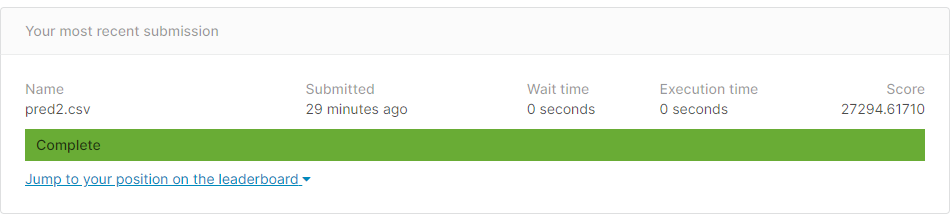

# Features of Significance

In [91]:
lasso_coef = pd.Series(lasso.coef_, index =features).sort_values(ascending = False).to_frame(name = 'lasso_coef')
lasso_coef

,lasso_coef
overallqual,20073.497928
grlivarea,18160.470920
exterqual,8537.679279
kitchenqual,6771.227279
garagecars,4065.434098
...,...
exterior1st_plywood,-0.000000
paveddrive_n,-0.000000
extercond,0.000000
electrical_sbrkr,0.000000


In [92]:
cross_lasso_coef = pd.Series(cross_lasso.coef_, index=poly.get_feature_names(features2)).sort_values(ascending = False).to_frame(name = 'cross_lasso_coef')
cross_lasso_coef

,cross_lasso_coef
overallqual grlivarea,22332.831999
overallqual totalbsmtsf,11230.168666
exterqual 1stflrsf,9491.450044
grlivarea kitchenqual,9409.077022
bsmtfinsf1 bsmtqual,8398.212179
...,...
masvnrarea saletype_new,-5448.045723
totalbsmtsf lotarea,-7479.342518
bsmtfinsf1 lotarea,-8114.542649
1stflrsf^2,-10598.888417


In [93]:
cross_lasso_coef[cross_lasso_coef['cross_lasso_coef'] != 0].shape

(75, 1)

In [94]:
cross_lasso_coef.head(10)

,cross_lasso_coef
overallqual grlivarea,22332.831999
overallqual totalbsmtsf,11230.168666
exterqual 1stflrsf,9491.450044
grlivarea kitchenqual,9409.077022
bsmtfinsf1 bsmtqual,8398.212179
bsmtqual lotarea,7893.851745
exterqual bsmtfinsf1,7474.638404
garagecars masvnrarea,7149.667280
yearbuilt,6955.356019
neighborhood_nridght masvnrarea,5850.418403


As a new homeowner, it may be tough to isolate what parts of property to lookout for in order to make the best of your investment. With these variables, hopefully this can give people more confidence to make their best guess. 
- The biggest correlation for a house to sale price is unsurprisingly, the overall quality of the house, tied to the general living area. Additionally, the 2nd highest coef also alludes to the same thing. If a house is big and nice, it's gonna be costly. 
- Secondly, in most of the other relations, bsmtqual(The height of the basement) & lotarea for example, spaciousness drives prices. 
- It may be more prudent for homeowners to refrain from modifying the height of their basement since it could adversely affect the price of their home. 
- For people buying property in neighborhood_nright(Northridge Heights) having a significant amount of masonry veneer is valued. A stone wall is valued styling in that area.